In [290]:
import matplotlib.pyplot as plt
import numpy as np
import math

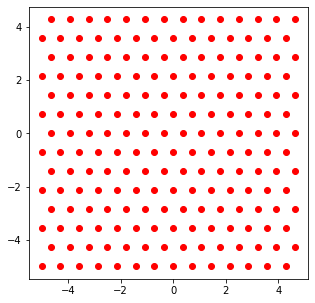

In [303]:
alpha = 0.2
rc = 1
L = 10 * rc
num = 218
dot_list = []
# 后续算法
status_list = []
#Top - 1
#for i in range(num):
#    x = np.random.uniform(-L / 2.0, L / 2.0)
#    y_max = ((L / 2.0) ** 2 - x ** 2) ** 0.5
#    y = np.random.uniform(-y_max, y_max)
#    dot_list.append(np.array((x * 1.0, y * 1.0)))
#    status_list.append(np.array((x * 1.0, y * 1.0)))
#Top - 2
#for i in range(num):
#    x = np.random.uniform(0, L)
#    y = np.random.uniform(0, L)
#    dot_list.append(np.array((x * 1.0, y * 1.0)))
#    status_list.append(np.array((x * 1.0, y * 1.0)))
#Top - 3
#r = L / (2 + 2 ** 0.5)
#loc = L / (2 + 2 * 2 ** 0.5)
#for i in range(num):
#    if i % 2 == 0: loc = -loc
#    x = np.random.uniform(loc - r, loc + r)
#    y_max = (r ** 2 - (x-loc) ** 2) ** 0.5
#    y = np.random.uniform(loc-y_max, loc+y_max)
#    dot_list.append(np.array((x * 1.0, y * 1.0)))
#    status_list.append(np.array((x * 1.0, y * 1.0)))
#Top - 4
#for i in range(num):
#    x = np.random.uniform(-L / 2.0, L / 2.0)
#    y_min = ((L * 0.6 / 2.0) ** 2 - x ** 2) ** 0.5
#    y_max = ((L / 2.0) ** 2 - x ** 2) ** 0.5
#    if math.fabs(x) >= 0.6 * L / 2:
#        y = np.random.uniform(-y_max, y_max)
#    else:
#        flag = np.random.randint(0,2)
#        if flag:
#            y = np.random.uniform(y_min, y_max)
#        else:
#            y = np.random.uniform(-y_min, -y_max)
#    dot_list.append(np.array((x * 1.0, y * 1.0)))
#    status_list.append(np.array((x * 1.0, y * 1.0)))
#Top - 5
#for i in range(num):
#    x = np.random.uniform(0, L / 2.0)
#    y = np.random.uniform(0, L)
#    if y > 2 * x:
#        x = x + L / 2
#        y = L - y
#    dot_list.append(np.array((x * 1.0, y * 1.0)))
#    status_list.append(np.array((x * 1.0, y * 1.0)))
#Top - 6
#for i in range(num):
#    flag = np.random.randint(0, 5)
#    if flag == 0:
#        x = np.random.uniform(0, L / 3.0)
#        y = np.random.uniform(L / 3.0, L / 3.0 * 2)
#    if 0 < flag < 4:
#        x = np.random.uniform(L / 3.0, L / 3.0 * 2)
#        y = np.random.uniform(0, L)
#    if flag == 4:
#        x = np.random.uniform(L / 3.0 * 2, L)
#        y = np.random.uniform(L / 3.0, L / 3.0 * 2)
#    dot_list.append(np.array((x * 1.0, y * 1.0)))
#    status_list.append(np.array((x * 1.0, y * 1.0)))
#Top - 7
#m = L / 2 / (0.5 * rc)
#k = 0.8
# 弧度=弧长/半径
#radian = k * rc
#for i in range(1, int(m)):
#    r = L / 2 / m * i
#    for j in range(4 * i):
#        dot_list.append(np.array((r * np.cos(2 * math.pi / (4 * i) * j), r * np.sin(2 * math.pi / (4 * i) * j))))
#        status_list.append(np.array((r * np.cos(2 * math.pi / (4 * i) * j), r * np.sin(2 * math.pi / (4 * i) * j))))
#dot_list.append(np.array((0,0)))
#status_list.append(np.array((0,0)))
#Top - 8
#for i in range(1,11):
#    r = L / 2 / 10 * i
#    for j in range(1,21):
#        dot_list.append(np.array((r * np.cos(2 * math.pi / 20 * j), r * np.sin(2 * math.pi / 20 * j))))
#dot_list.append(np.array((0,0)))
#status_list.append(np.array((0,0)))
#Top - 9
for i in range(14):
    r = L / 14
    for j in range(14):
        if j % 2 == 0:
            dot_list.append(np.array((-5 + r * i, -5 + r * j)))
        else:
            if j==14:continue
            dot_list.append(np.array((-5 + r * i + r / 2, -5 + r * j)))
#Top - 10


#Test-fig
plt.figure(figsize=(5, 5))
for x in dot_list:
    plt.scatter(x[0], x[1], c='red')
plt.show()

In [304]:
def dst(dot1, dot2):
    return ((dot1[0] - dot2[0]) ** 2 + ((dot1[1] - dot2[1]) ** 2)) ** 0.5


a_mat = np.zeros((num, num))

m_mat = np.zeros((num, num))

for i, dot1 in enumerate(dot_list):
    for j, dot2 in enumerate(dot_list):
        if i == j: continue
        if dst(dot1, dot2) <= rc:
            a_mat[i][j] = 1

for i in range(num):
    for j in range(num):
        if a_mat[i][j] == 1:
            for k in range(num):
                if a_mat[i][k] and a_mat[j][k]:
                    m_mat[i][j] += 1

w_mat = (1 - alpha) * a_mat + alpha * m_mat

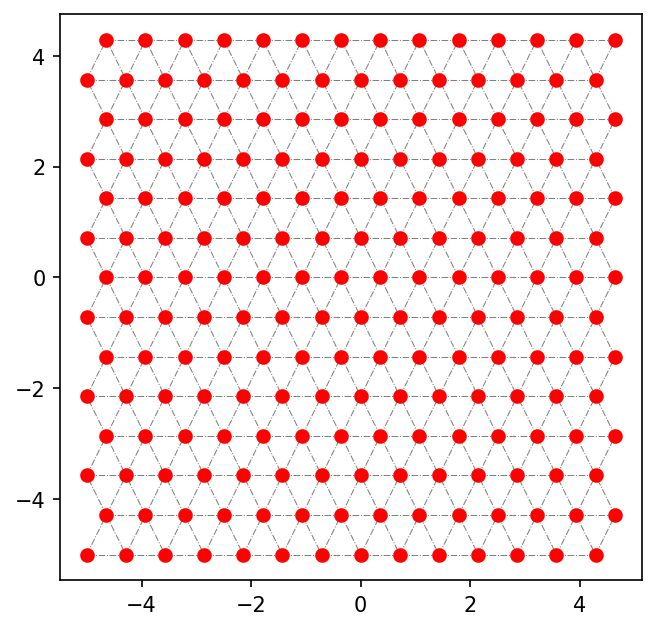

In [305]:
plt.figure(figsize=(5, 5), dpi=150)
for x in dot_list:
    plt.scatter(x[0], x[1], c='red', zorder=1)
for i in range(num):
    for j in range(i, num):
        if a_mat[i][j] != 0:
            plt.plot([dot_list[i][0], dot_list[j][0]], [dot_list[i][1], dot_list[j][1]], '-.', c='grey', linewidth=0.5,
                     zorder=0)
plt.show()